Student name:Jorge Blanco

Student ID: 24246948

Please use this notebook to work on Task 2. You should not import any additional modules.

- The 'as' keyword allows you to invoke functionality from the module using an alias for the module name. For example: np.mean() instead of numpy.mean()
- The from keyword allows you to only import the functionality of interest, for example above we import only the PCA class from the sklearn.decomposition module

In [3]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

TEST DATA

In [1]:
a_x = 0.05
a_y= 10

In [71]:
data =  np.array([[n*(1+a_x*(rand.random()-0.5)),4*n+ a_y*(rand.random()-0.5)] for n in range(20)])

The numpy shape property is very useful to get an insight in the dimensions of your data, for example to check whether the features (in this case 2) or the samples (in this case 20) are in the rows or the columns. The notation used here (with columns containing the features and rows containing separate examples) is the standard for Scikitlearn and many other machine learning toolboxes.


In [72]:
data.shape

(20, 2)

In [73]:
data

array([[ 0.        ,  0.25008458],
       [ 1.01480301,  6.09965363],
       [ 2.04326466,  5.65235543],
       [ 2.97315599, 11.90372003],
       [ 3.94645803, 16.68067102],
       [ 5.03022179, 24.09750976],
       [ 6.00214176, 25.13495704],
       [ 7.12196227, 32.41570981],
       [ 7.97909031, 35.58343084],
       [ 8.91686877, 34.13751633],
       [10.16741377, 35.69962499],
       [11.04894619, 48.42074689],
       [11.80923106, 43.44516784],
       [13.1264464 , 56.81163497],
       [14.04887682, 52.1916036 ],
       [15.29865947, 64.43679716],
       [16.05945802, 68.00285741],
       [16.98496048, 63.7904805 ],
       [17.79626723, 72.9998576 ],
       [19.20853953, 77.0711889 ]])

In [74]:
X_std = (data - data.mean(axis=0)) / data.std(axis=0)
print(X_std)

[[-1.64685056 -1.66110155]
 [-1.47146413 -1.40866126]
 [-1.29371711 -1.42796457]
 [-1.1330058  -1.15818465]
 [-0.9647919  -0.95203358]
 [-0.77748712 -0.63195719]
 [-0.60951209 -0.58718578]
 [-0.41597569 -0.27298223]
 [-0.26783992 -0.13627807]
 [-0.1057655  -0.19867704]
 [ 0.11036376 -0.13126367]
 [ 0.26271729  0.417721  ]
 [ 0.39411584  0.20299807]
 [ 0.6217676   0.77983285]
 [ 0.78118945  0.5804537 ]
 [ 0.99718696  1.10889951]
 [ 1.12867429  1.26279414]
 [ 1.28862707  1.08100748]
 [ 1.42884364  1.47844151]
 [ 1.67292391  1.65414131]]


[0.99560458]


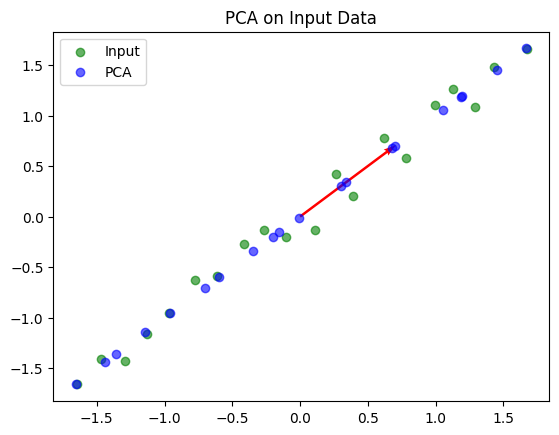

In [135]:
pca = PCA(n_components=1) # keep 1 component
pca.fit(X_std)
X_pca = pca.transform(X_std)

print(pca.explained_variance_ratio_)

# The vector to plot (the first principal component from PCA)
# this is the first eigenvector of the covariance matrix as resulting from PCA
mean = pca.mean_
vector =abs( pca.components_[0])

X_std_reconstructed = pca.inverse_transform(X_pca)

plt.quiver(mean[0], mean[1], vector[0], vector[1],  angles='xy', scale_units='xy', scale=1, color='red', width=0.005)
plt.scatter(X_std[:,0], X_std[:,1], color='green', label='Input',  alpha=0.6)
plt.scatter(X_std_reconstructed[:,0], X_std_reconstructed[:,1], color='blue', label='PCA',  alpha=0.6)
plt.legend()
plt.title('PCA on Input Data')
plt.xlabel('xs')
plt.ylabel('ys');

In [136]:
# Use Numpy to calculate the Eigen vectors of the data's covariance matrix and check your results using the output from the PCA performed in step 1.
# Calculate the covariance matrix
covariance_matrix = np.cov(X_std.T)

eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print(eigenvectors)
print(pca.components_)


[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[[0.70710678 0.70710678]]
